In [1]:
import pandas as pd

csv_file = pd.read_csv("data/preprocessed_sidewalks_hazards.csv")
csv_file.head()

,Unnamed: 0.1,Unnamed: 0,Type,GlobalID,CreationDa,Creator,EditDate,Editor,geometry,address,pincode,x,y
0,0,0,Trip hazards not due to tree roots,1f823362-3158-4962-a052-63c0423f0920,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7910200.2581 5215757.319600001),"{'road': 'MA 3', 'suburb': 'West End', 'city':...",2113,-71.058538,42.364634
1,1,1,Trip hazards not due to tree roots,ff26eb97-df6d-4397-818d-039286455d6e,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7910200.8184 5215760.144199997),"{'road': 'MA 3', 'suburb': 'West End', 'city':...",2113,-71.058543,42.364653
2,2,2,Trip hazards not due to tree roots,08a1879f-4d56-4f87-9bff-56a6f2afcce1,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7910197.051000002 5215768.779700004),"{'road': 'MA 3', 'suburb': 'West End', 'city':...",2113,-71.058509,42.364710
3,3,3,Trip hazards not due to tree roots,f16493e6-ae37-400b-b4e8-03e29a628101,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7909968.1286 5215370.892200001),{'tourism': 'Canopy by Hilton Boston Downtown'...,2201,-71.056453,42.362069
4,4,4,Trip hazards not due to tree roots,5ea5e09e-c351-4777-ae62-120cb83eee07,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7909975.9311 5215370.464400001),{'tourism': 'Canopy by Hilton Boston Downtown'...,2201,-71.056523,42.362066


In [2]:
import json
csv_file["road"] = csv_file["address"].apply(lambda x: eval(x).get("road"))
csv_file["county"] = csv_file["address"].apply(lambda x: eval(x).get("county"))
csv_file["neighbourhood"] = csv_file["address"].apply(lambda x: eval(x).get("neighbourhood"))
#csv_file["zipcodes"] = csv_file["address"].apply(lambda x: eval(x).get("zipcodes"))

# csv_file

In [3]:
csv_file.groupby("Type")[["x","y"]].count()

,x,y
Type,,
Fixed pinch point <36” sidewalk width,1137,1137
Trip hazards due to tree roots,2053,2053
Trip hazards not due to tree roots,3803,3803


There are three types of hazards observed.

Most of the trip hazards are not due to tree roots.

In [4]:
neighbourhood_tracker = csv_file.groupby("neighbourhood")["GlobalID"].count()
# neighbourhood_tracker

The top three regions with most hazards are:

1.   Highland -> 503
2.   Dorchester Heights -> 260
3.   Mount Hope -> 144



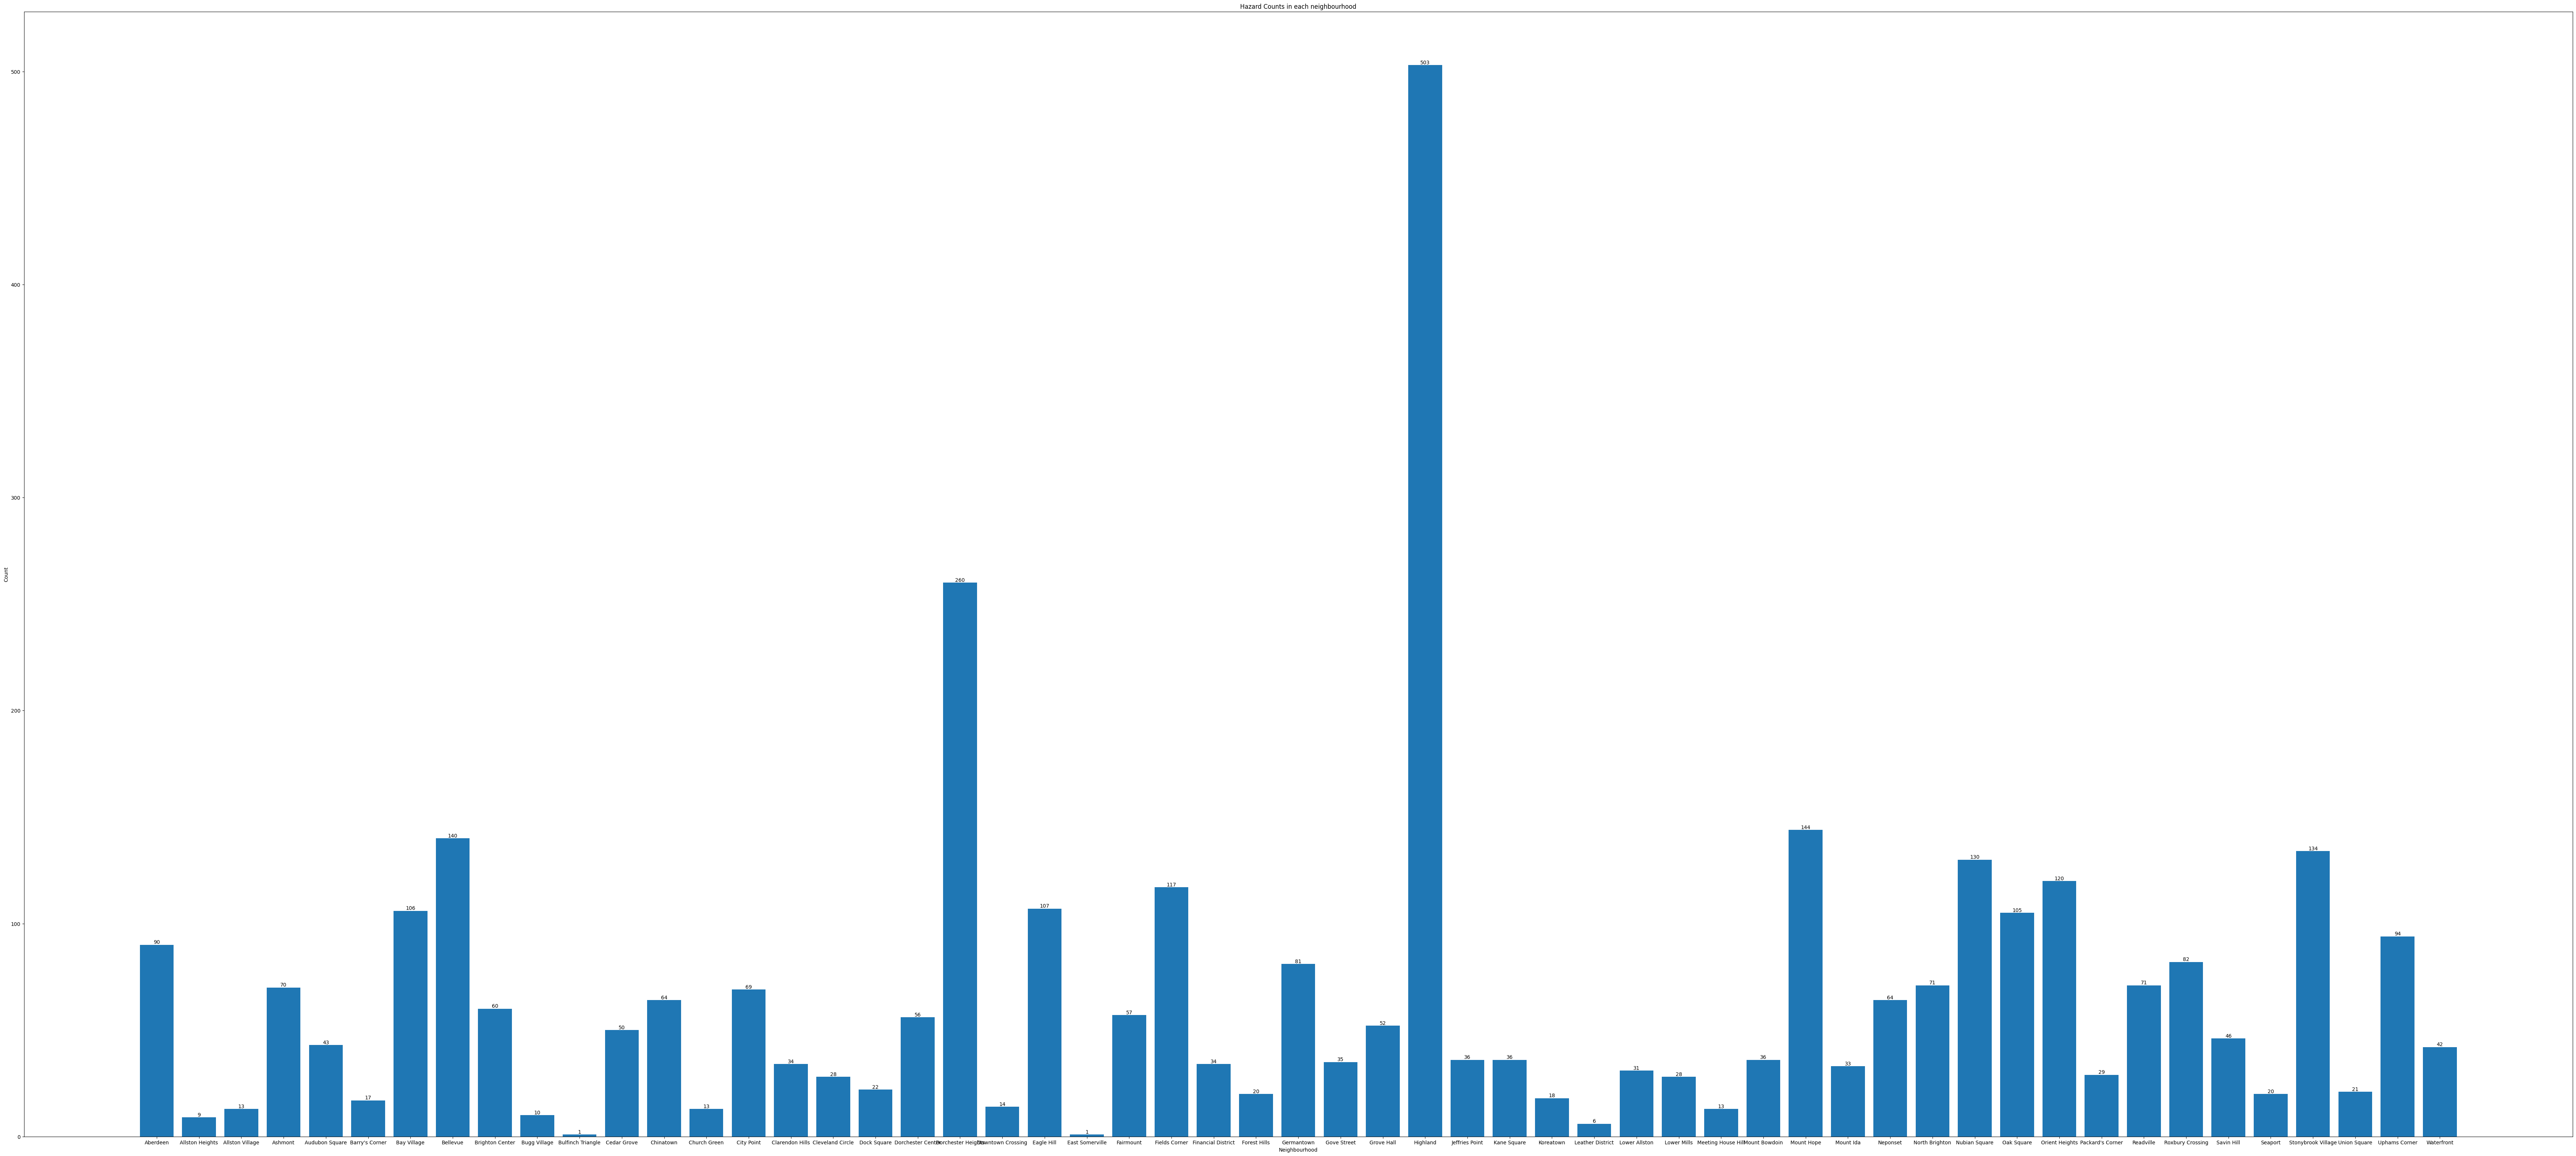

In [7]:
neighbourhood_tracker = csv_file.groupby("neighbourhood")["GlobalID"].count()
neighbourhood_tracker
import matplotlib.pyplot as plt
plt.figure(figsize=(90,40))
plt1= plt.bar(neighbourhood_tracker.index,neighbourhood_tracker)
plt.bar_label(plt1)
plt.xlabel("Neighbourhood")
plt.ylabel('Count')
plt.title("Hazard Counts in each neighbourhood")
plt.savefig("./HazardCountinNeighbourhood.pdf")
#plt.close()

In [9]:
neighbourhood_tracker = csv_file.groupby(["neighbourhood","Type"])["GlobalID"].count()

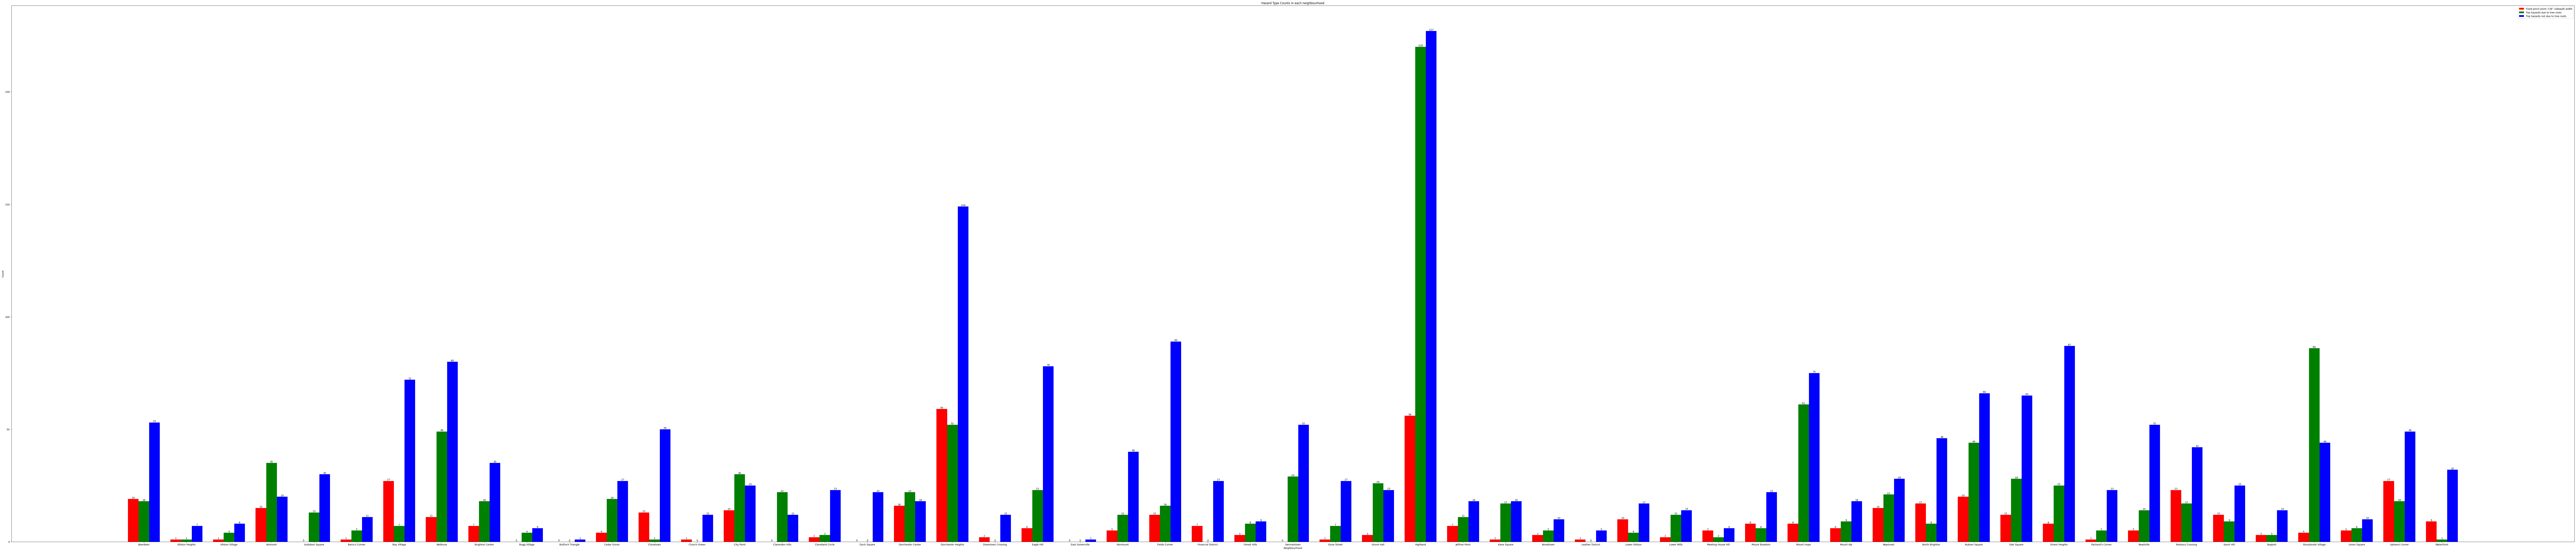

<Figure size 640x480 with 0 Axes>

In [8]:
# Vertical Plot
neighbourhood_tracker = csv_file.groupby(["neighbourhood","Type"])["GlobalID"].count()
neighbourhood_tracker

import numpy as np

fixed = []
trip_roots = []
trip_not_roots = []


neighbour_dict = {}
t = neighbourhood_tracker
t.index[0]
for i in range(len(t.index)):
    neighbour = t.index[i][0]
    hazard = t.index[i][1]
    if neighbour not in neighbour_dict:
        neighbour_dict[neighbour] = {}
    neighbour_dict[neighbour][hazard] = t[i]

hazard_types = ['Fixed pinch point <36” sidewalk width', 'Trip hazards due to tree roots', 'Trip hazards not due to tree roots'] 
hazard_dict = {}
for type in hazard_types:
    hazard_dict[type] = []

for neighbour in list(neighbour_dict.keys()):
    for type in hazard_types:
        if type in neighbour_dict[neighbour]:
            hazard_dict[type].append(neighbour_dict[neighbour][type])
        else:
            hazard_dict[type].append(0)

x_axis=[]
for i in neighbourhood_tracker.index:
  if i[0] not in x_axis:
    x_axis.append(i[0])
#x_axis = [i[0] for i in neighbourhood_tracker.index]

fixed = hazard_dict['Fixed pinch point <36” sidewalk width']
trip_roots = hazard_dict['Trip hazards due to tree roots']
trip_not_roots = hazard_dict['Trip hazards not due to tree roots']
ind = np.arange(len(x_axis)) 
width = 0.25
plt.figure(figsize=(190,40))
bar1 = plt.bar(ind, fixed, width, color = 'r')

bar2 = plt.bar(ind+width, trip_roots, width, color='g')

bar3 = plt.bar(ind+width*2, trip_not_roots, width, color = 'b')
plt.bar_label(bar1)
plt.bar_label(bar2)
plt.bar_label(bar3)

plt.xlabel("Neighbourhood")
plt.ylabel('Count')
plt.title("Hazard Type Counts in each neighbourhood")
plt.xticks(ind+width,x_axis)
plt.legend( (bar1, bar2, bar3), ('Fixed pinch point <36” sidewalk width', 'Trip hazards due to tree roots', 'Trip hazards not due to tree roots') )
plt.show()

plt.savefig("./HazardTypesCountinNeigbourhood_V.pdf")

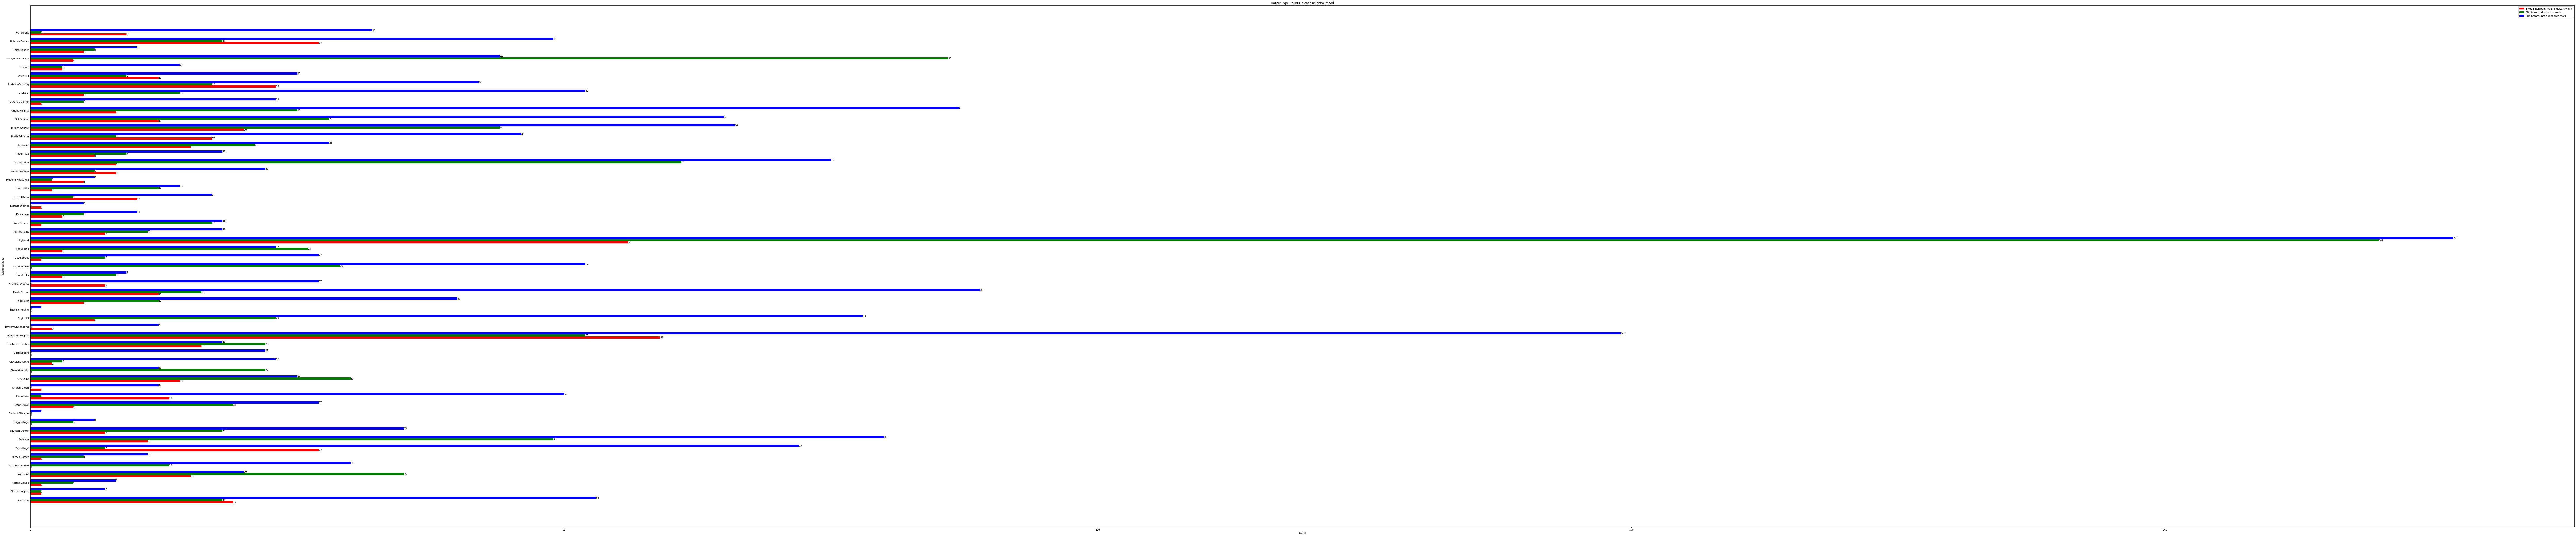

<Figure size 432x288 with 0 Axes>

In [32]:
# Horizontal Plot
neighbourhood_tracker = csv_file.groupby(["neighbourhood","Type"])["GlobalID"].count()
neighbourhood_tracker

import numpy as np

fixed = []
trip_roots = []
trip_not_roots = []


neighbour_dict = {}
t = neighbourhood_tracker
t.index[0]
for i in range(len(t.index)):
    neighbour = t.index[i][0]
    hazard = t.index[i][1]
    if neighbour not in neighbour_dict:
        neighbour_dict[neighbour] = {}
    neighbour_dict[neighbour][hazard] = t[i]

hazard_types = ['Fixed pinch point <36” sidewalk width', 'Trip hazards due to tree roots', 'Trip hazards not due to tree roots'] 
hazard_dict = {}
for type in hazard_types:
    hazard_dict[type] = []

for neighbour in list(neighbour_dict.keys()):
    for type in hazard_types:
        if type in neighbour_dict[neighbour]:
            hazard_dict[type].append(neighbour_dict[neighbour][type])
        else:
            hazard_dict[type].append(0)

x_axis=[]
for i in neighbourhood_tracker.index:
  if i[0] not in x_axis:
    x_axis.append(i[0])
#x_axis = [i[0] for i in neighbourhood_tracker.index]

fixed = hazard_dict['Fixed pinch point <36” sidewalk width']
trip_roots = hazard_dict['Trip hazards due to tree roots']
trip_not_roots = hazard_dict['Trip hazards not due to tree roots']
ind = np.arange(len(x_axis)) 
width = 0.25
plt.figure(figsize=(190,40))
bar1 = plt.barh(ind, fixed, width, color = 'r')

bar2 = plt.barh(ind+width, trip_roots, width, color='g')

bar3 = plt.barh(ind+width*2, trip_not_roots, width, color = 'b')
plt.bar_label(bar1)
plt.bar_label(bar2)
plt.bar_label(bar3)

plt.ylabel("Neighbourhood")
plt.xlabel('Count')
plt.title("Hazard Type Counts in each neighbourhood")
plt.yticks(ind+width,x_axis)
plt.legend( (bar1, bar2, bar3), ('Fixed pinch point <36” sidewalk width', 'Trip hazards due to tree roots', 'Trip hazards not due to tree roots') )
plt.show()

plt.savefig("./HazardTypesCountinNeigbourhood_H.pdf")

In [9]:
import folium
from folium import plugins, Map


base_map = Map(location=[42.361145, -71.057083],zoom_start = 30)
csv_file['x'] = csv_file['x'].astype(float)
csv_file['y'] = csv_file['y'].astype(float)

def color_cluster(index):
    if index == "Fixed pinch point <36” sidewalk width":
        return 'green'
    elif index == "Trip hazards due to tree roots":
        return 'blue'
    elif index == "Trip hazards not due to tree roots": 
        return 'red'
    else:
        return 'yellow'


#hazards= csv_file.sort_values(by=["Type"],ascending=False)

for point in range(0, len(csv_file)):
    folium.CircleMarker([csv_file.iloc[point]['y'], csv_file.iloc[point]['x']],color = color_cluster(csv_file.iloc[point]['Type']), fill = True, fill_color = color_cluster(csv_file.iloc[point]['Type'])).add_to(base_map)



base_map.save("./hazard_locator.html")



In [12]:
type_tracker = csv_file.groupby("Type")["GlobalID"].count()
type_tracker

Type
Fixed pinch point <36” sidewalk width    1137
Trip hazards due to tree roots           2053
Trip hazards not due to tree roots       3803
Name: GlobalID, dtype: int64

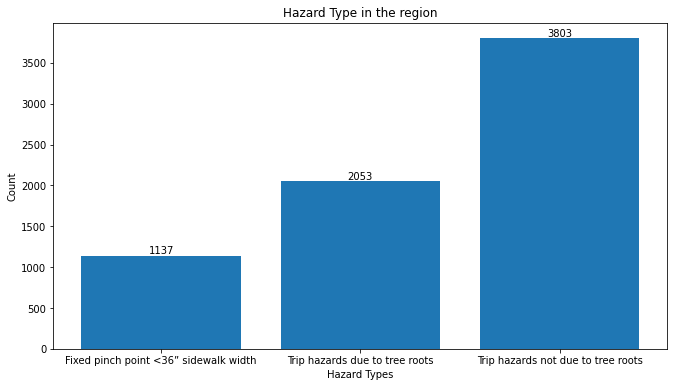

In [34]:
type_tracker = csv_file.groupby("Type")["GlobalID"].count()
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
plt1=plt.bar(type_tracker.index,type_tracker)
plt.bar_label(plt1)
plt.xlabel("Hazard Types")
plt.ylabel('Count')
plt.title("Hazard Type in the region")
plt.savefig("./HazardTypes.pdf")

In [14]:
from sklearn.cluster import KMeans
import folium
from folium import plugins, Map

unique_hazard_types = csv_file["Type"].unique()


def color_cluster(index):
    if index == 0:
        return 'green'
    elif index == 1:
        return 'blue'
    elif index == 2: 
        return 'red'
    elif index == 3:
        return 'yellow'
    elif index == 4:
        return 'purple'
    elif index == 5:
        return 'orange'
    elif index == 6: 
        return 'darkred'
    elif index == 7:
        return 'lightred'
    elif index == 8:
        return 'darkgreen'
    elif index == 9:
        return 'cadetblue'
    else:
        return 'darkblue'

cluster_centers = {}
for i in unique_hazard_types:
  temp_df = csv_file[csv_file["Type"]==i]
  kmeans = KMeans(n_clusters=10, random_state=0)
  kmeans.fit(temp_df[["x","y"]])
  boston_map = Map(location=[42.361145, -71.057083],zoom_start = 30)
  #print(kmeans.labels_.shape)
  #print(kmeans.cluster_centers_)
  cluster_centers.update({i:kmeans.cluster_centers_})
  
  #filename = "./"+i+".html"
  #boston_map.save(filename)

  for point in range(0, len(temp_df)):
    folium.CircleMarker([temp_df.iloc[point]['y'], temp_df.iloc[point]['x']],color = color_cluster(kmeans.labels_[point]), fill = True, fill_color = color_cluster(kmeans.labels_[point])).add_to(boston_map)
  filename = "./"+i+".html"
  boston_map.save(filename)




  

In [15]:
cluster_centers


import geopy
import pandas as pd
geolocator = geopy.Nominatim(user_agent='my-application1')
import asyncio 

def get_zipcode(geolocator, lat_field, lon_field):
    location = geolocator.reverse((lat_field, lon_field))

    return location.raw['address']

def extract_address(lat_field, lon_field):
  #response = await asyncio.gather(*asyncio.ensure_future(get_zipcode(geolocator,lat_field, lon_field)))
  return get_zipcode(geolocator,lat_field, lon_field)



for key,val in cluster_centers.items():
  print(key)
  for j in val:
    #print(j)
    #print(extract_address(j[1],j[0]))
    print({"Neighbourhood":extract_address(j[1],j[0]).get("neighbourhood"),"Suburb":extract_address(j[1],j[0]).get("suburb")})




Trip hazards not due to tree roots
{'Neighbourhood': 'Roxbury Crossing', 'Suburb': 'Roxbury'}
{'Neighbourhood': 'Highland', 'Suburb': 'West Roxbury'}
{'Neighbourhood': None, 'Suburb': 'Charlestown'}
{'Neighbourhood': None, 'Suburb': 'Roslindale'}
{'Neighbourhood': 'Bugg Village', 'Suburb': 'Brighton'}
{'Neighbourhood': 'Dorchester Heights', 'Suburb': 'South Boston'}
{'Neighbourhood': None, 'Suburb': 'Hyde Park'}
{'Neighbourhood': 'Dorchester Center', 'Suburb': 'Dorchester'}
{'Neighbourhood': 'Bay Village', 'Suburb': None}
{'Neighbourhood': None, 'Suburb': 'East Boston'}
Fixed pinch point <36” sidewalk width
{'Neighbourhood': None, 'Suburb': 'Jamaica Plain'}
{'Neighbourhood': None, 'Suburb': 'East Boston'}
{'Neighbourhood': None, 'Suburb': 'Charlestown'}
{'Neighbourhood': None, 'Suburb': 'Hyde Park'}
{'Neighbourhood': 'Uphams Corner', 'Suburb': 'Dorchester'}
{'Neighbourhood': 'Bugg Village', 'Suburb': 'Brighton'}
{'Neighbourhood': 'Bay Village', 'Suburb': 'Back Bay'}
{'Neighbourhood': '

Dorchester Heights is a common neighbourhood that has all the three types of hazards.

In [ ]:
#Generate the address using the latitude and longitude
import geopy
import pandas as pd
geolocator = geopy.Nominatim(user_agent='my-application1')
import asyncio 

async def get_zipcode(geolocator, lat_field, lon_field):
    location = geolocator.reverse((lat_field, lon_field))

    return location.raw['address']

zipcodes = []


for i in range(len(csv_file)):
  zipcodes.append(asyncio.ensure_future(get_zipcode(geolocator,csv_file.iloc[point]['y'],csv_file.iloc[point]['x'])))


response = await asyncio.gather(*zipcodes)
response

csv_file["road"] = [i.get("road") for i in response]
csv_file["county"] = [i.get("county") for i in response]
csv_file["neighbourhood"] = [i.get("neighbourhood") for i in response]
csv_file["zipcodes"] = [i.get("postcode") for i in response]

[{'house_number': '675;677',
  'road': 'Washington Street',
  'neighbourhood': 'Ashmont',
  'suburb': 'Dorchester',
  'city': 'Boston',
  'county': 'Suffolk County',
  'state': 'Massachusetts',
  'ISO3166-2-lvl4': 'US-MA',
  'postcode': '02124',
  'country': 'United States',
  'country_code': 'us'}]